In [1]:
import numpy as np
import scipy.io
from tqdm import tqdm
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
# import numpy as np
# import scipy.io
# from tqdm import tqdm

# # Parameters
# N = 800
# Pf = 0.8
# Pn = 0.4
# variance = 0.1
# num_iterations = 50000

# # Symbol sets
# symbol_bpsk = np.array([-1+0j, 1+0j])
# theta1 = np.cos(np.pi/8) + 1j*np.sin(np.pi/8)
# symbol_qpsk = theta1 * np.array([0.7071+0.7071j, -0.7071+0.7071j, 0.7071-0.7071j, -0.7071-0.7071j])
# symbol_8psk = np.array([1, 0.7071+0.7071j, 1j, -0.7071+0.7071j, -1, -0.7071-0.7071j, -1j, 0.7071-0.7071j])
# qam = np.array([-1-1j, 1-1j, 1+1j, -1+1j, -3-1j, -1-3j, 1-3j, 3-1j,
#                 3+1j, 1+3j, -1+3j, -3+1j, -3-3j, 3-3j, 3+3j, -3+3j])
# qam16 = qam.reshape(-1, 1)
# sqrt_mean = np.sqrt(np.mean(np.abs(qam16)**2))
# symbol_16qam = qam16 / sqrt_mean

# # Set of symbols
# setof_symbs = [symbol_bpsk, symbol_qpsk, symbol_8psk, symbol_16qam]

# # Data storage
# true_lbls = np.zeros(num_iterations)
# data_y = np.zeros((num_iterations, N), dtype=complex)
# all_snrs = np.zeros(num_iterations)
# all_h = np.zeros(num_iterations)

# snrs = []
# data_Y = []
# true_Mods = []

# # Simulation loop
# for snr_db in tqdm(range(-10, 21, 2), desc="Processing SNR"):
#     snr = 10**(snr_db/10)
    
#     for iter in tqdm(range(num_iterations), desc="Iterations", leave=False):
#         xr = np.random.randn()
#         yi = np.random.randn()
#         h = np.sqrt(variance * (xr**2 + yi**2))
#         all_h[iter] = h
        
#         i = np.random.randint(0, 4)
#         true_lbls[iter] = i
#         j = np.random.randint(0, 4)
        
#         symb_far = setof_symbs[i]
#         symb_near = setof_symbs[j]
        
#         xf = np.random.choice(symb_far.flatten(), N, replace=True)
#         xn = np.random.choice(symb_near.flatten(), N, replace=True)
        
#         y0 = h * (np.sqrt(Pf) * xf + np.sqrt(Pn) * xn)
#         ps = np.sum(np.abs(y0)**2) / len(y0)
        
#         noisepower = ps / snr
#         z = np.sqrt(noisepower * 0.5) * (np.random.randn(N) + 1j * np.random.randn(N))
#         pn = np.sum(np.abs(z)**2) / len(z)
#         y = y0 + z
        
#         snr_y = ps / pn
#         all_snrs[iter] = snr_y
#         data_y[iter, :] = y
    
#     snrs.extend([snr_db] * num_iterations)
#     data_Y.append(data_y.copy())
#     true_Mods.extend(true_lbls.copy())

# data_Y = np.vstack(data_Y)
# true_Mods = np.array(true_Mods)

# # import h5py

# # # File name
# # file_name = 'dataset_NOMA_N_800_1_2.h5'

# # # Save to HDF5
# # with h5py.File(file_name, 'w') as hf:
# #     hf.create_dataset('data_Y', data=data_Y)
# #     hf.create_dataset('true_Mods', data=true_Mods)
# #     hf.create_dataset('snrs', data=snrs)

# # print(f"Dataset saved as '{file_name}'")


In [ ]:
# import h5py

# # File name
# file_name = 'dataset_NOMA_N_800_1_2.h5'

# # Save to HDF5
# with h5py.File(file_name, 'w') as hf:
#     hf.create_dataset('data_Y', data=data_Y)
#     hf.create_dataset('true_Mods', data=true_Mods)
#     hf.create_dataset('snrs', data=snrs)

# print(f"Dataset saved as '{file_name}'")

In [2]:
import h5py

# File name
file_name = 'dataset_NOMA_N_800_1_2.h5'

# Access and print the data
with h5py.File(file_name, 'r') as hf:
    data_Y = hf['data_Y'][:,:200]
    true_Mods = hf['true_Mods'][:]
    snrs = hf['snrs'][:]
    print(f"Shape of data_Y: {data_Y.shape}")
    print(f"Shape of true_Mods: {true_Mods.shape}")
    print(f"Shape of snrs: {snrs.shape}")

# print("data_Y:",data_Y.shape, data_Y[0].shape)
# print("data_Y:", data_Y[0][799])
# print("true_Mods:", true_Mods[:])
# print("snrs:", snrs[:])

Shape of data_Y: (800000, 200)
Shape of true_Mods: (800000,)
Shape of snrs: (800000,)


In [2]:
# print("data_Y:", data_Y[0][:])

#### Shape of data_Y: (800000, 800)
#### Shape of true_Mods: (800000,)
#### Shape of snrs: (800000,)
#### Each signal 800 Point : Total 800000 Signals : both Real & Imaginary in same column
#### shape of data_Y[i] : i X 800

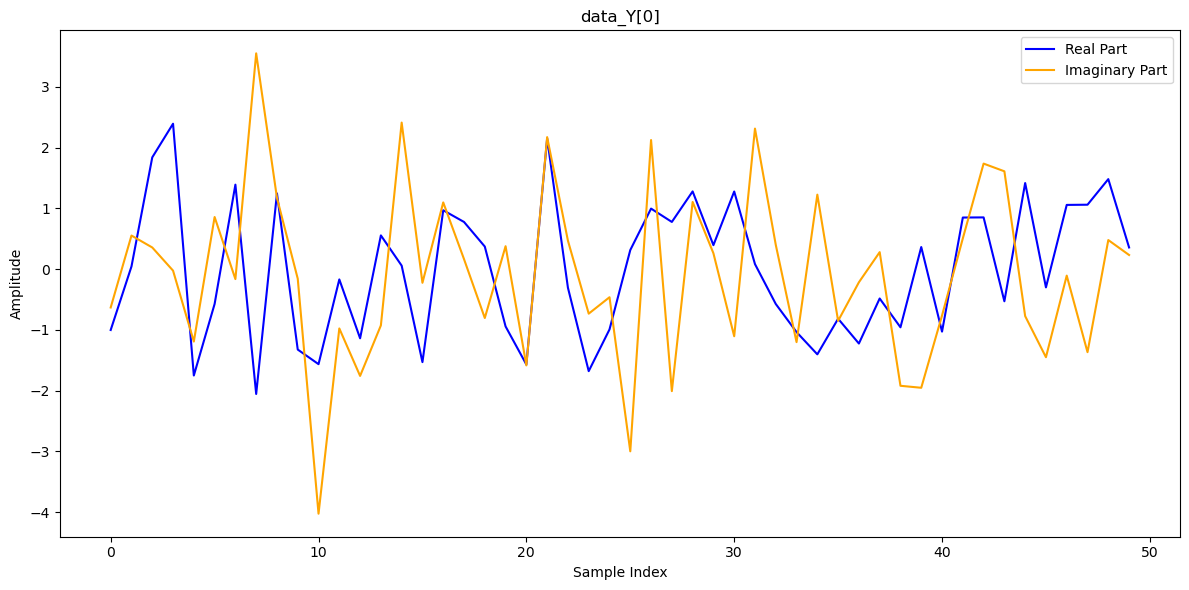

In [3]:
import matplotlib.pyplot as plt

#  Signal
signal = data_Y[0][:50]

plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
plt.plot(signal.real, label='Real Part', color='blue')
plt.title('Real Part of data_Y[0]')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

# plt.subplot(2, 1, 2)
plt.plot(signal.imag, label='Imaginary Part', color='orange')
plt.title('Imaginary Part of data_Y[0]')
plt.title('data_Y[0]')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# (-0.2525679973170962+0.7865235410144311j)

In [4]:
# Extract features (I and Q components), labels, and SNR levels
snrs = np.array(snrs)

y = np.array(true_Mods)
unique_mods = np.unique(y)
num_classes = len(unique_mods)


X = np.expand_dims(data_Y, axis=-1)
print(f"Shape of X: {X.shape}")

X_real = np.real(X)
X_imag = np.imag(X)
X = np.stack((X_real, X_imag), axis=-1)

X = np.transpose(X, (0, 3, 1, 2))
print(f"Shape of X: {X.shape}")

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test, snr_train, snr_test = train_test_split(X, y, snrs, test_size=0.4, random_state=42)
X_train, X_test, y_train, y_test, snr_train, snr_test = train_test_split(X, y, snrs, test_size=0.4)

# # Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shape of X: (800000, 200, 1)
Shape of X: (800000, 2, 200, 1)
X_train shape: (480000, 2, 200, 1)
X_test shape: (320000, 2, 200, 1)
y_train shape: (480000, 4)
y_test shape: (320000, 4)


# Functional API:

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_residual_block(input_tensor):
    
    main_path = layers.Conv2D(16, (1, 8), activation='relu', padding='same')(input_tensor)
    skip_path = layers.Conv2D(16, (1, 1), activation='relu', padding='same')(input_tensor)
    output = layers.Concatenate()([main_path, skip_path])
    
    return output

def create_mr_cnn(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Define the model
    x = layers.Conv2D(64, (2, 8), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (2, 4), activation='relu', padding='same')(x)
    x = modified_residual_block(x)
    x = layers.AveragePooling2D(pool_size=(1, 3), strides=1)(x)
    x = layers.Conv2D(16, (1, 3), activation='relu', padding='same')(x)
    x = modified_residual_block(x)
    x = layers.AveragePooling2D(pool_size=(1, 8), strides=1)(x)
    x = layers.Conv2D(8, (1, 3), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(24, activation='relu')(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    
    return model


input_shape = (2, 200, 1)
model = create_mr_cnn(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 2, 200, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 2, 200, 64)        │           1,088 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 2, 200, 32)        │          16,416 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 2, 200, 16)        │           4,112 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 2, 200, 16)        │             528 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 2, 200, 32)        │               0 │ conv2d_2[0][0],            │
│                               │                           │                 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_pooling2d             │ (None, 2, 198, 32)        │               0 │ concatenate[0][0]          │
│ (AveragePooling2D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 2, 198, 16)        │           1,552 │ average_pooling2d[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 2, 198, 16)        │           2,064 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 2, 198, 16)        │             272 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 2, 198, 32)        │               0 │ conv2d_5[0][0],            │
│                               │                           │                 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_pooling2d_1           │ (None, 2, 191, 32)        │               0 │ concatenate_1[0][0]        │
│ (AveragePooling2D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 2, 191, 8)         │             776 │ average_pooling2d_1[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 3056)              │               0 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │         391,296 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 421,300 (1.61 MB)

 Trainable params: 421,300 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
batch_size = 500
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 550s 565ms/step - accuracy: 0.4197 - loss: 1.0950 - val_accuracy: 0.5468 - val_loss: 0.9211
Epoch 2/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 535s 557ms/step - accuracy: 0.5725 - loss: 0.8834 - val_accuracy: 0.5827 - val_loss: 0.8657
Epoch 3/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 420s 437ms/step - accuracy: 0.6137 - loss: 0.8087 - val_accuracy: 0.6288 - val_loss: 0.7772
Epoch 4/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 463s 483ms/step - accuracy: 0.6255 - loss: 0.7845 - val_accuracy: 0.6327 - val_loss: 0.7654
Epoch 5/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 432s 450ms/step - accuracy: 0.6349 - loss: 0.7638 - val_accuracy: 0.6572 - val_loss: 0.7254
Epoch 6/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 362s 377ms/step - accuracy: 0.6569 - loss: 0.7285 - val_accuracy: 0.6633 - val_loss: 0.7173
Epoch 7/20
960/960 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.6703 - loss: 0.7066

In [9]:
# Make predictions
y_pred = model.predict(X_test)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step


In [10]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
# for i in range(len(y_true)):
#     print(y_true[i],y_pred_classes[i])

Normalized Confusion Matrix:
[[0.87508743 0.02481765 0.04011791 0.05997702]
 [0.05052513 0.58413353 0.18333333 0.182008  ]
 [0.05371376 0.09062718 0.60722826 0.24843081]
 [0.06408486 0.0760482  0.19502887 0.66483806]]


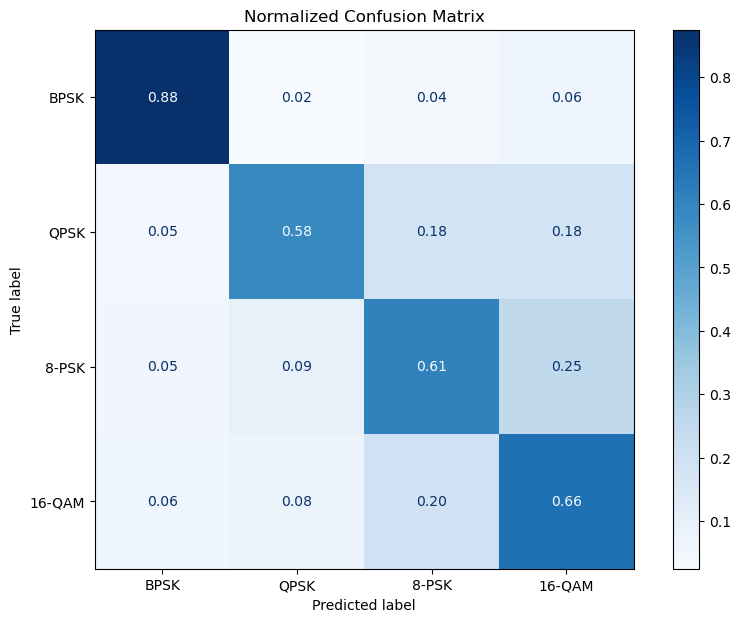

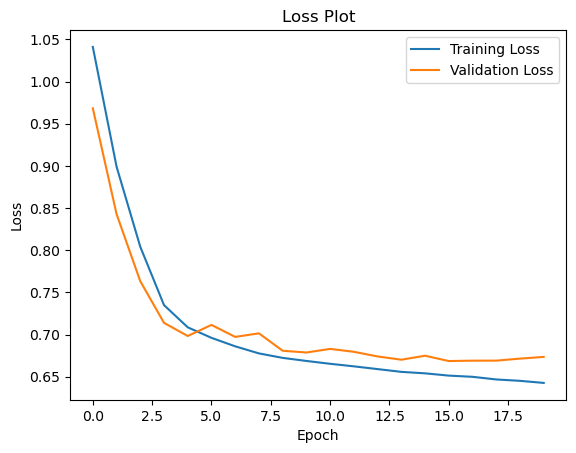

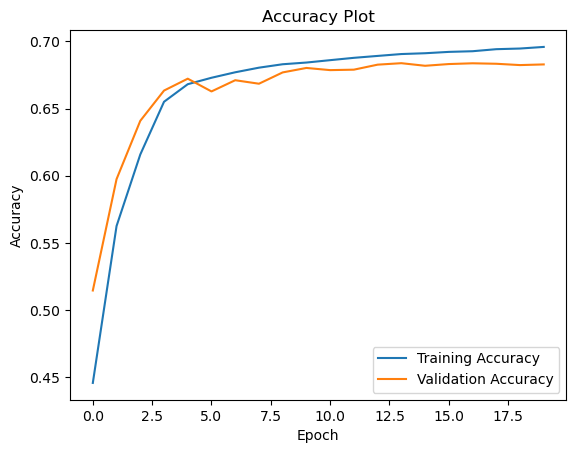

In [11]:
modulation_mapping = {
    0: 'BPSK',
    1: 'QPSK',
    2: '8-PSK',
    3: '16-QAM'
}
# Get the class labels in the order of modulation_mapping
labels = [modulation_mapping[i] for i in range(num_classes)]

def plot_normalized_confusion_matrix(cm, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10, 7))
    disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")
    plt.title('Normalized Confusion Matrix')
    plt.show()

cm = confusion_matrix(y_true, y_pred_classes, labels=np.arange(num_classes))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix:")
print(cm_normalized)
plot_normalized_confusion_matrix(cm_normalized, labels)


# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()


# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


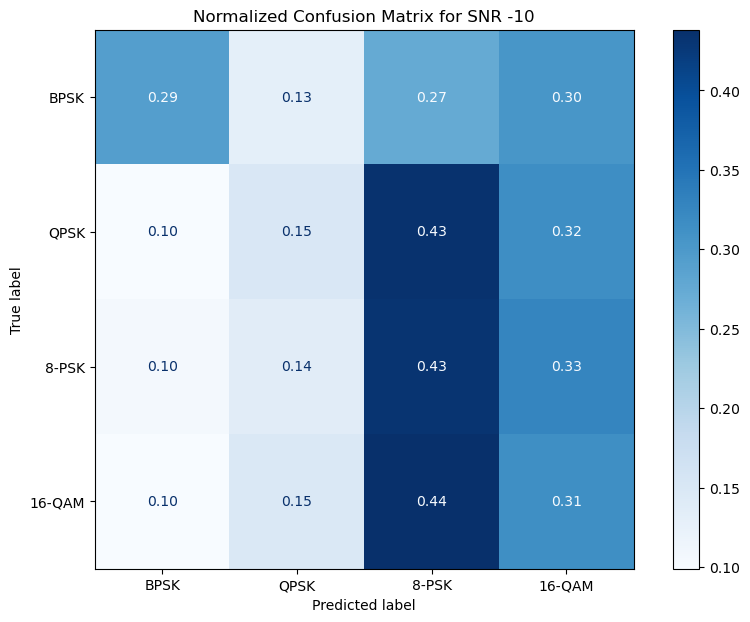

628/628 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


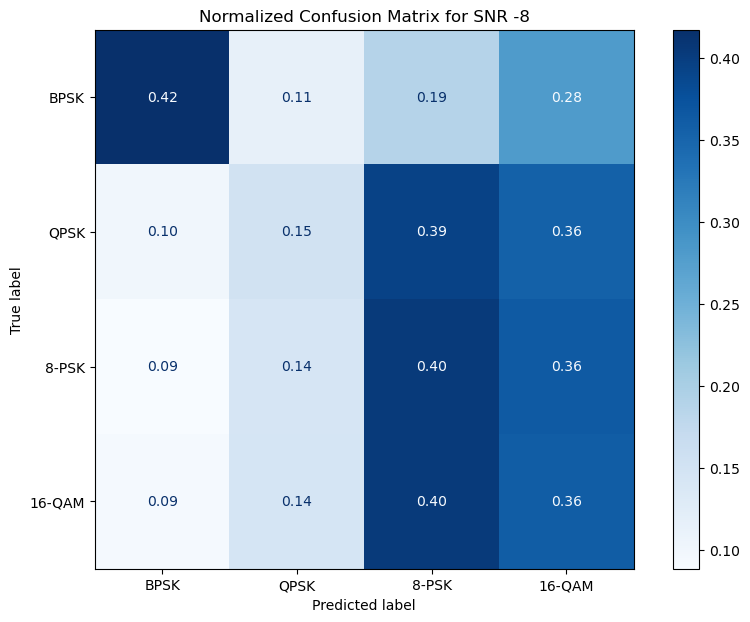

618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


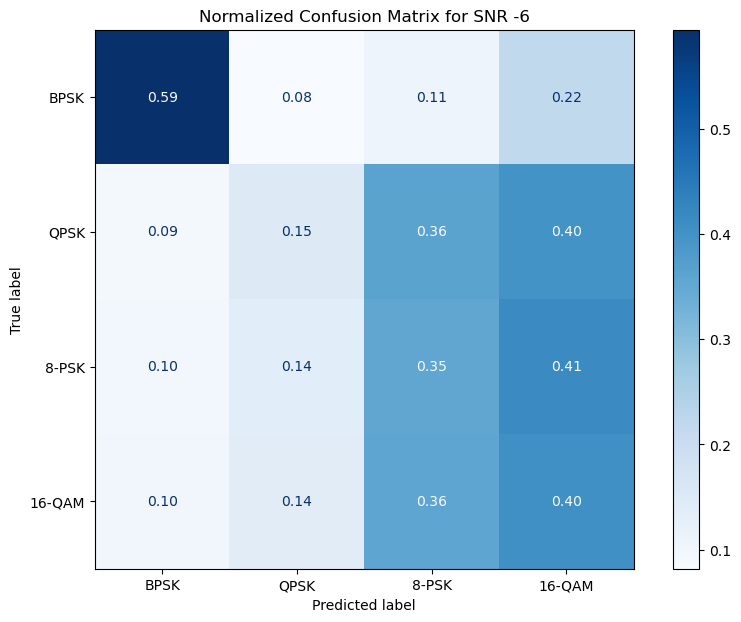

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


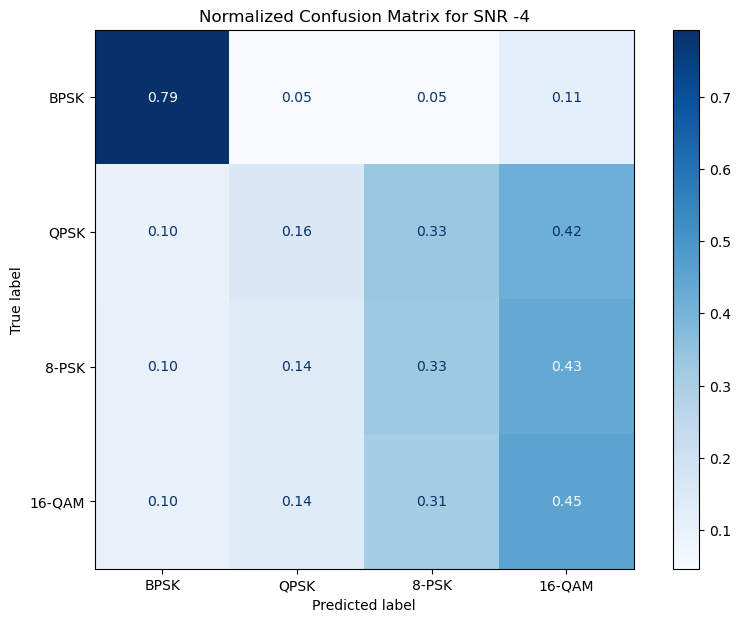

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


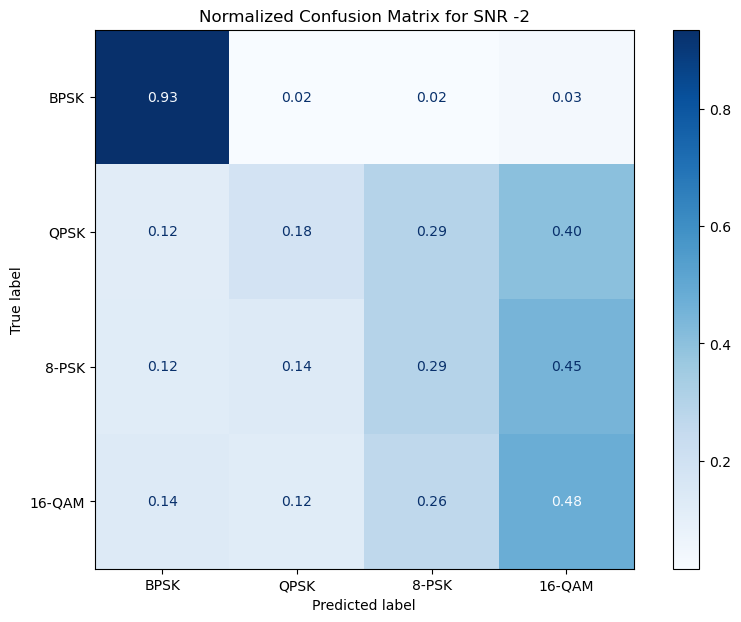

629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


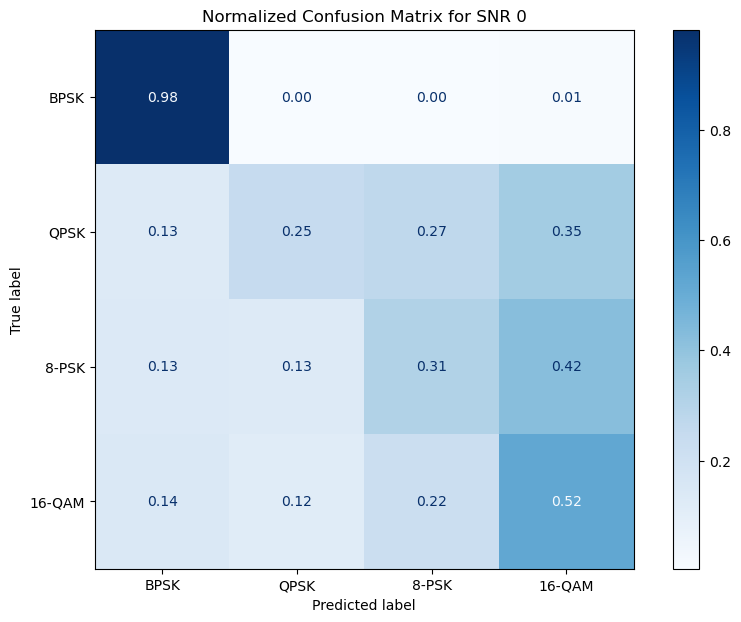

628/628 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


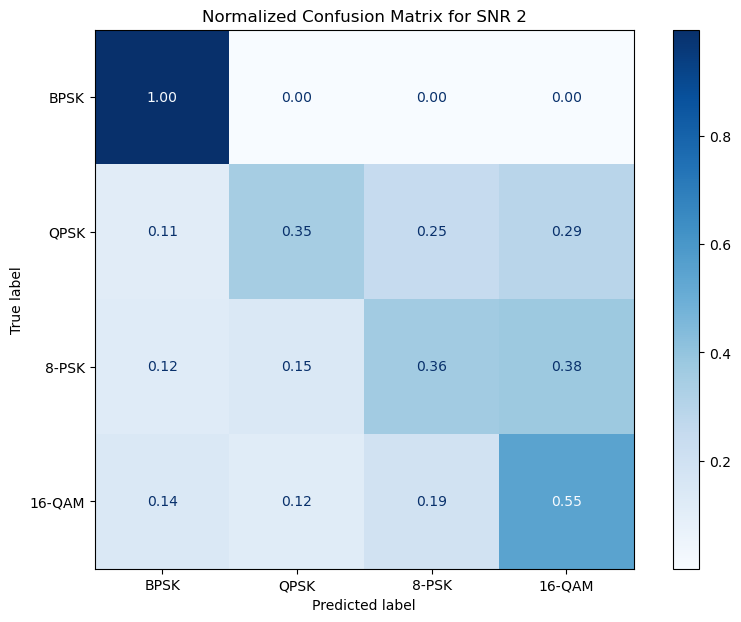

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


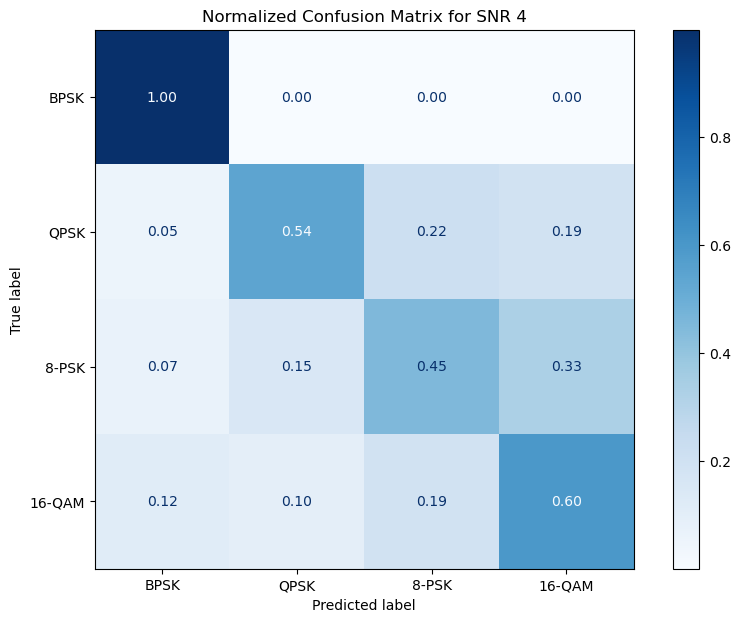

632/632 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


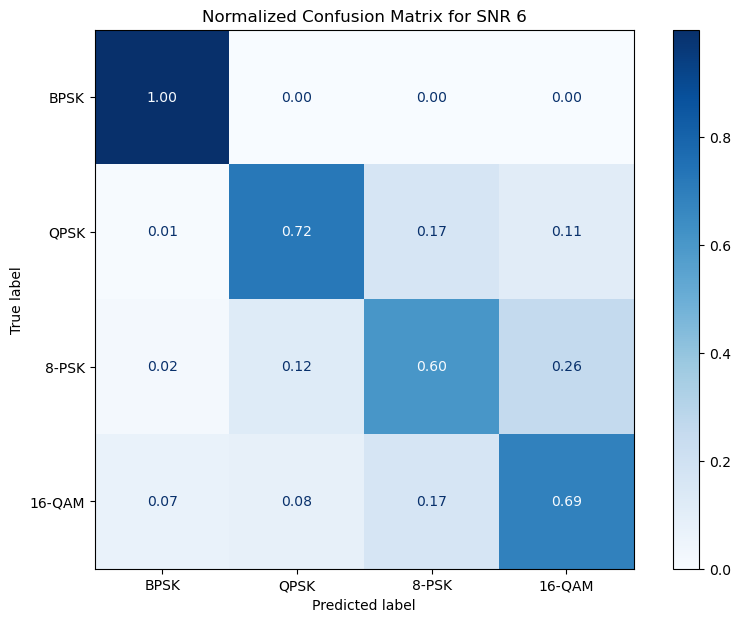

623/623 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


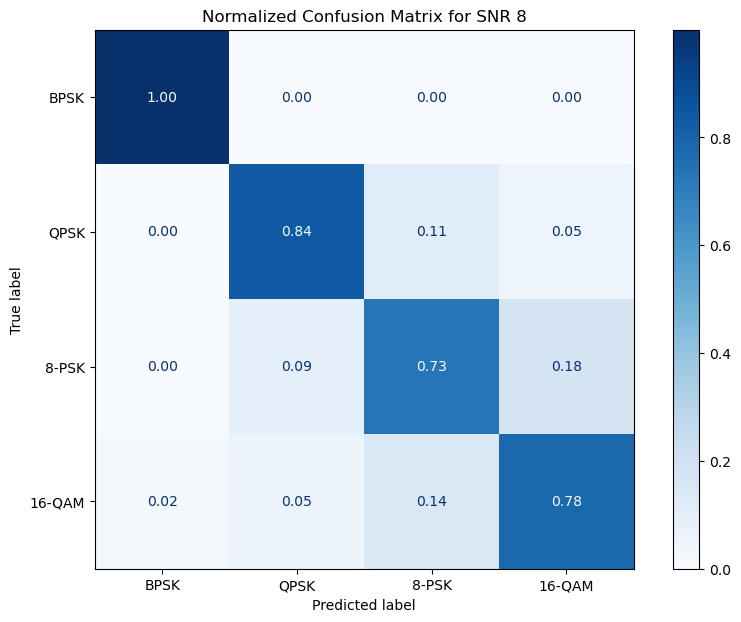

626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


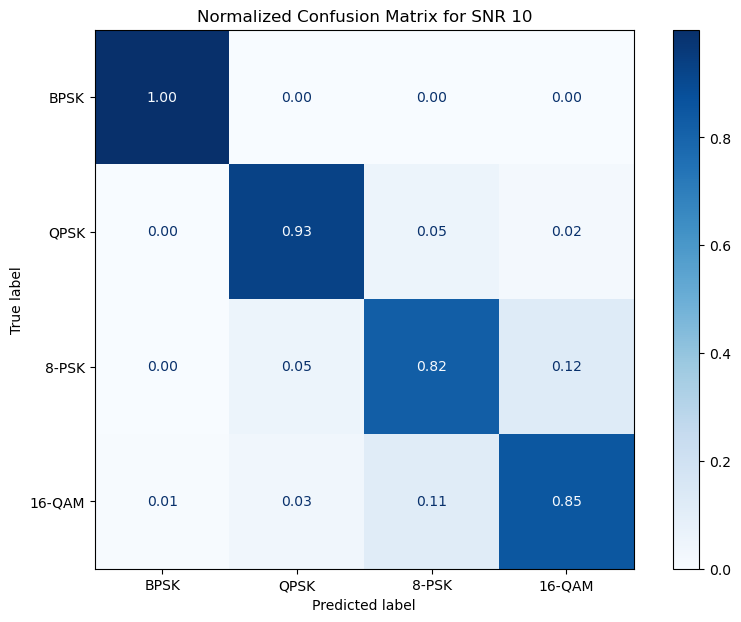

621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


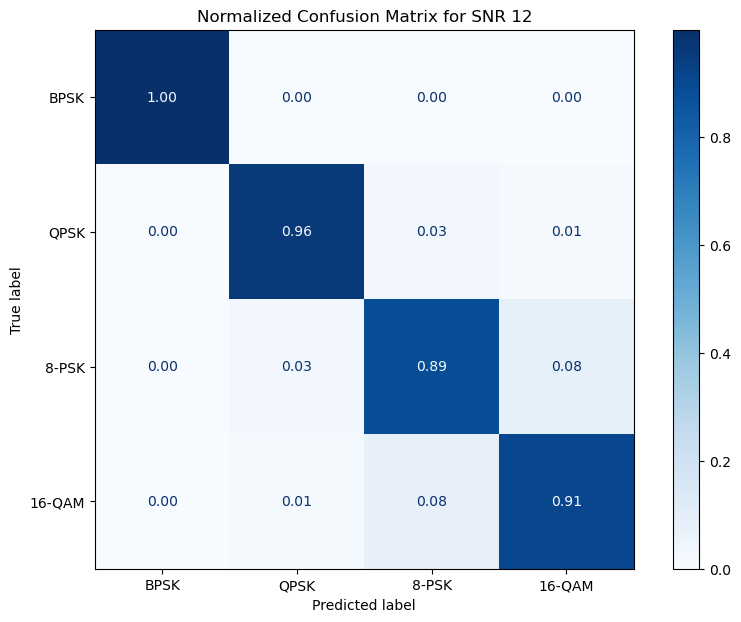

626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


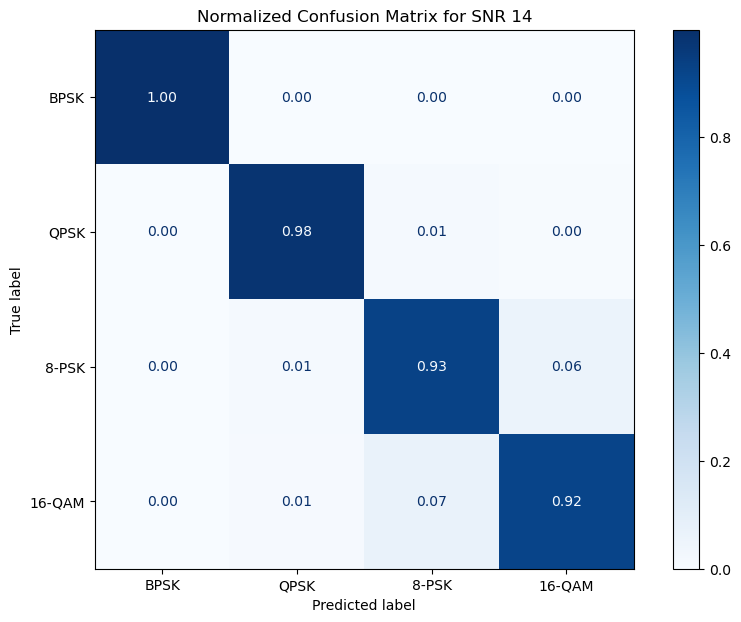

617/617 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


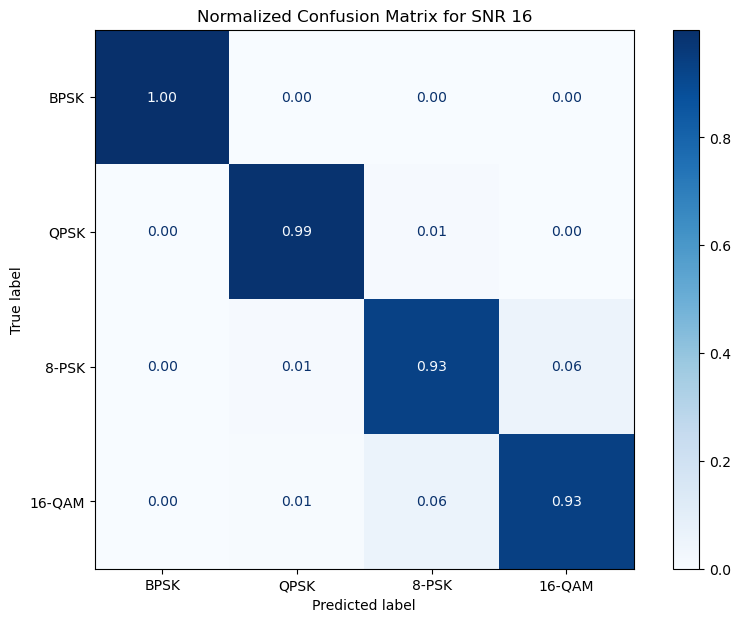

633/633 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


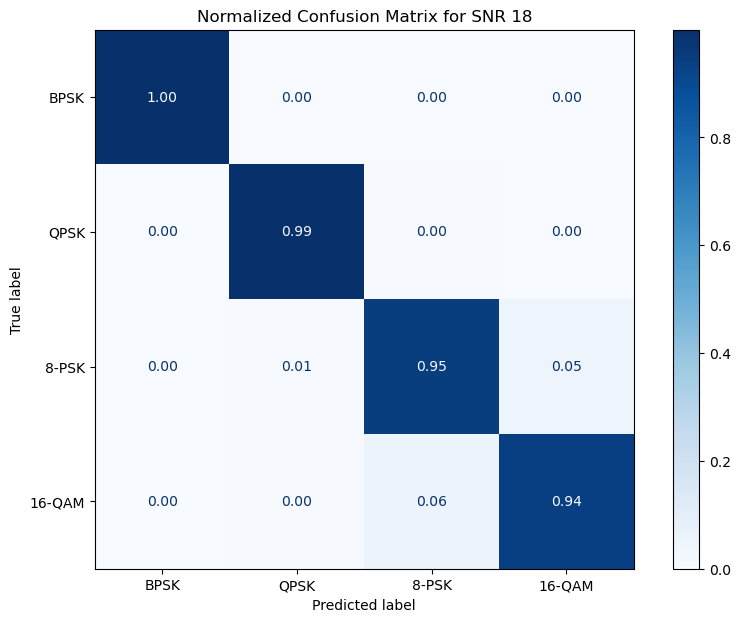

624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


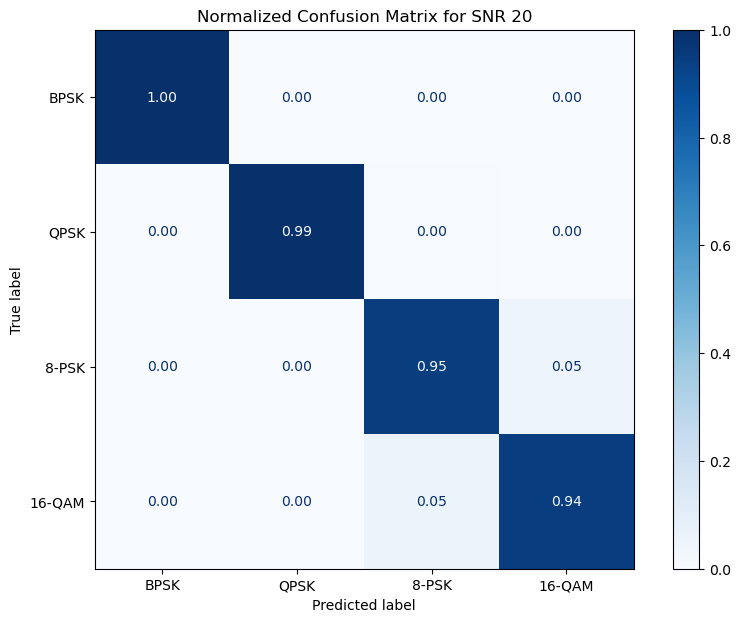

In [12]:
# Evaluate and plot confusion matrix and accuracy for each SNR level
snr_levels = np.unique(snr_test)
accuracy_per_snr = []

for snr_level in snr_levels:
    def plot_normalized_confusion_matrix(cm, labels, title):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        fig, ax = plt.subplots(figsize=(10, 7))
        disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")
        plt.title(title)
        plt.show()
        
    # Get data for this SNR level
    snr_indices = np.where(snr_test == snr_level)
    X_snr = X_test[snr_indices]
    y_snr_true = y_true[snr_indices]
    y_snr_test = y_test[snr_indices]

    # Make predictions
    y_snr_pred = model.predict(X_snr)
    y_snr_pred_classes = np.argmax(y_snr_pred, axis=1)

    # Calculate confusion matrix for this SNR level
    snr_conf_matrix = confusion_matrix(y_snr_true, y_snr_pred_classes, labels=np.arange(num_classes))
    
    # Normalize the confusion matrix by row (true labels)
    snr_conf_matrix_normalized = snr_conf_matrix.astype('float') / snr_conf_matrix.sum(axis=1)[:, np.newaxis]

    plot_normalized_confusion_matrix(snr_conf_matrix_normalized, labels, f'Normalized Confusion Matrix for SNR {snr_level}')

    # Calculate accuracy
    accuracy = np.sum(y_snr_pred_classes == y_snr_true) / len(y_snr_true)
    accuracy_per_snr.append(accuracy)

## Weight Bised Value Store TXT

In [52]:
# Extract weights and biases from the dense layers by using the correct indices
weights_biases = {}

# Print the model layers with their indices
for i, layer in enumerate(model.layers):
    # Check if the layer has the output_shape attribute
    if hasattr(layer, 'output_shape'):
        print(f"Index: {i}, Layer: {layer.name}, Output Shape: {layer.output_shape}")
    else:
        print(f"Index: {i}, Layer: {layer.name}")

# Update these indices based on the printed output
dense_128_index = 14  # Adjust this if the index is different in your model
dense_24_index = 15   # Adjust this if the index is different in your model
dense_4_index = 16   # Adjust this if the index is different in your model

# Dense layer with 128 neurons
weights_biases['dense_128'] = {
    'weights': model.layers[dense_128_index].get_weights()[0],
    'biases': model.layers[dense_128_index].get_weights()[1]
}

# Dense layer with 24 neurons
weights_biases['dense_24'] = {
    'weights': model.layers[dense_24_index].get_weights()[0],
    'biases': model.layers[dense_24_index].get_weights()[1]
}

# Dense layer with 4 neurons (output layer)
weights_biases['dense_4'] = {
    'weights': model.layers[dense_4_index].get_weights()[0],
    'biases': model.layers[dense_4_index].get_weights()[1]
}

# Save the weights and biases in the desired format
with open("WeightsAndBiases.txt", "w") as f:
    for layer, wb in weights_biases.items():
        f.write(f"Layer: {layer}\n")
        f.write(f"Weights:\n{wb['weights']}\n")
        f.write(f"Biases:\n{wb['biases']}\n")
        f.write("\n")

print("Weights and biases saved to WeightsAndBiases.txt")

Index: 0, Layer: input_layer
Index: 1, Layer: conv2d
Index: 2, Layer: conv2d_1
Index: 3, Layer: conv2d_2
Index: 4, Layer: conv2d_3
Index: 5, Layer: concatenate
Index: 6, Layer: average_pooling2d
Index: 7, Layer: conv2d_4
Index: 8, Layer: conv2d_5
Index: 9, Layer: conv2d_6
Index: 10, Layer: concatenate_1
Index: 11, Layer: average_pooling2d_1
Index: 12, Layer: conv2d_7
Index: 13, Layer: flatten
Index: 14, Layer: dense
Index: 15, Layer: dense_1
Index: 16, Layer: dense_2
Weights and biases saved to WeightsAndBiases.txt


## Weight Bised Value Store Excell

In [47]:
import pandas as pd

# Extract weights and biases from the dense layers by using the correct indices
weights_biases = {}

# Print the model layers with their indices
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'output_shape'):
        print(f"Index: {i}, Layer: {layer.name}, Output Shape: {layer.output_shape}")
    else:
        print(f"Index: {i}, Layer: {layer.name}")

# Update these indices based on the printed output
dense_128_index = 14  # Adjust this if the index is different in your model
dense_24_index = 15   # Adjust this if the index is different in your model
dense_4_index = 16    # Adjust this if the index is different in your model

# Dense layers
layers_indices = {
    'dense_128': dense_128_index,
    'dense_24': dense_24_index,
    'dense_4': dense_4_index
}

# Iterate over the layers to extract and save weights and biases in separate Excel files
for layer_name, index in layers_indices.items():
    # Extract weights and biases
    weights = model.layers[index].get_weights()[0]
    biases = model.layers[index].get_weights()[1]

    # Convert weights and biases to DataFrames
    weights_df = pd.DataFrame(weights)
    biases_df = pd.DataFrame(biases, columns=['Biases'])

    # Save to Excel file with two sheets: 'Weights' and 'Biases'
    with pd.ExcelWriter(f"{layer_name}.xlsx") as writer:
        weights_df.to_excel(writer, sheet_name='Weights', index=False)
        biases_df.to_excel(writer, sheet_name='Biases', index=False)

    print(f"Weights and biases saved to {layer_name}.xlsx")

print("All weights and biases saved successfully.")


Index: 0, Layer: input_layer
Index: 1, Layer: conv2d
Index: 2, Layer: conv2d_1
Index: 3, Layer: conv2d_2
Index: 4, Layer: conv2d_3
Index: 5, Layer: concatenate
Index: 6, Layer: average_pooling2d
Index: 7, Layer: conv2d_4
Index: 8, Layer: conv2d_5
Index: 9, Layer: conv2d_6
Index: 10, Layer: concatenate_1
Index: 11, Layer: average_pooling2d_1
Index: 12, Layer: conv2d_7
Index: 13, Layer: flatten
Index: 14, Layer: dense
Index: 15, Layer: dense_1
Index: 16, Layer: dense_2
Weights and biases saved to dense_128.xlsx
Weights and biases saved to dense_24.xlsx
Weights and biases saved to dense_4.xlsx
All weights and biases saved successfully.


In [56]:
import pandas as pd
import numpy as np

# Extract filters and biases from the Conv2D layers by using the correct indices
filters_biases = {}

# Print the model layers with their indices
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'output_shape'):
        print(f"Index: {i}, Layer: {layer.name}, Output Shape: {layer.output_shape}")
    else:
        print(f"Index: {i}, Layer: {layer.name}")

# Conv2D layer indices
conv2d_indices = [1, 2, 3, 4, 7, 8, 9, 12]
flatten_index = 13  # Flatten layer index

# Iterate over the Conv2D layers to extract and save filters and biases
for index in conv2d_indices:
    # Extract filters and biases
    filters = model.layers[index].get_weights()[0]  # Filters (weights)
    biases = model.layers[index].get_weights()[1]   # Biases

    # Convert filters and biases to DataFrames
    filters_shape = filters.shape
    filters_df = pd.DataFrame(filters.reshape(-1, filters_shape[-1]))  # Flattening for DataFrame
    biases_df = pd.DataFrame(biases, columns=['Biases'])

    # Save to Excel file with two sheets: 'Filters' and 'Biases'
    layer_name = f"conv2d_{index}"
    with pd.ExcelWriter(f"{layer_name}.xlsx") as writer:
        filters_df.to_excel(writer, sheet_name='Filters', index=False)
        biases_df.to_excel(writer, sheet_name='Biases', index=False)

    print(f"Filters and biases saved to {layer_name}.xlsx")

# Handle the Flatten layer (index 13)
flatten_weights = model.layers[flatten_index].get_weights()  # Typically, flatten layer doesn't have weights

# If there are any weights associated, you can save them
if flatten_weights:
    flatten_df = pd.DataFrame(flatten_weights[0])
    flatten_df.to_excel("flatten_layer.xlsx", index=False)
    print("Flatten layer weights saved to flatten_layer.xlsx")
else:
    print(f"Flatten layer (index {flatten_index}) has no weights.")

print("All filters, biases, and flatten layer saved successfully.")


Index: 0, Layer: input_layer
Index: 1, Layer: conv2d
Index: 2, Layer: conv2d_1
Index: 3, Layer: conv2d_2
Index: 4, Layer: conv2d_3
Index: 5, Layer: concatenate
Index: 6, Layer: average_pooling2d
Index: 7, Layer: conv2d_4
Index: 8, Layer: conv2d_5
Index: 9, Layer: conv2d_6
Index: 10, Layer: concatenate_1
Index: 11, Layer: average_pooling2d_1
Index: 12, Layer: conv2d_7
Index: 13, Layer: flatten
Index: 14, Layer: dense
Index: 15, Layer: dense_1
Index: 16, Layer: dense_2
Filters and biases saved to conv2d_1.xlsx
Filters and biases saved to conv2d_2.xlsx
Filters and biases saved to conv2d_3.xlsx
Filters and biases saved to conv2d_4.xlsx
Filters and biases saved to conv2d_7.xlsx
Filters and biases saved to conv2d_8.xlsx
Filters and biases saved to conv2d_9.xlsx
Filters and biases saved to conv2d_12.xlsx
Flatten layer (index 13) has no weights.
All filters, biases, and flatten layer saved successfully.


## Weight Bised Value Store Txt ROW COL

In [55]:
import numpy as np

# Extract weights and biases from the dense layers by using the correct indices
weights_biases = {}

# Print the model layers with their indices
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'output_shape'):
        print(f"Index: {i}, Layer: {layer.name}, Output Shape: {layer.output_shape}")
    else:
        print(f"Index: {i}, Layer: {layer.name}")

# Update these indices based on the printed output
dense_128_index = 14  # Adjust this if the index is different in your model
dense_24_index = 15   # Adjust this if the index is different in your model
dense_4_index = 16    # Adjust this if the index is different in your model

# Dense layers
layers_indices = {
    'dense_128': dense_128_index,
    'dense_24': dense_24_index,
    'dense_4': dense_4_index
}

# Iterate over the layers to extract and save weights and biases in separate text files
for layer_name, index in layers_indices.items():
    # Extract weights and biases
    weights = model.layers[index].get_weights()[0]
    biases = model.layers[index].get_weights()[1]

    # Flatten the weights and biases to a single row
    weights_flattened = weights.flatten()
    biases_flattened = biases.flatten()

    # Save weights and biases to text files
    with open(f"{layer_name}_weights.txt", "w") as w_file:
        w_file.write(" ".join(map(str, weights_flattened)))
    
    with open(f"{layer_name}_biases.txt", "w") as b_file:
        b_file.write(" ".join(map(str, biases_flattened)))

    print(f"Weights saved to {layer_name}_weights.txt")
    print(f"Biases saved to {layer_name}_biases.txt")

print("All weights and biases saved successfully.")


Index: 0, Layer: input_layer
Index: 1, Layer: conv2d
Index: 2, Layer: conv2d_1
Index: 3, Layer: conv2d_2
Index: 4, Layer: conv2d_3
Index: 5, Layer: concatenate
Index: 6, Layer: average_pooling2d
Index: 7, Layer: conv2d_4
Index: 8, Layer: conv2d_5
Index: 9, Layer: conv2d_6
Index: 10, Layer: concatenate_1
Index: 11, Layer: average_pooling2d_1
Index: 12, Layer: conv2d_7
Index: 13, Layer: flatten
Index: 14, Layer: dense
Index: 15, Layer: dense_1
Index: 16, Layer: dense_2
Weights saved to dense_128_weights.txt
Biases saved to dense_128_biases.txt
Weights saved to dense_24_weights.txt
Biases saved to dense_24_biases.txt
Weights saved to dense_4_weights.txt
Biases saved to dense_4_biases.txt
All weights and biases saved successfully.


In [50]:
import numpy as np

# Extract weights and biases from the dense layers by using the correct indices
weights_biases = {}

# Print the model layers with their indices
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'output_shape'):
        print(f"Index: {i}, Layer: {layer.name}, Output Shape: {layer.output_shape}")
    else:
        print(f"Index: {i}, Layer: {layer.name}")

# Update these indices based on the printed output
dense_128_index = 14  # Adjust this if the index is different in your model
dense_24_index = 15   # Adjust this if the index is different in your model
dense_4_index = 16    # Adjust this if the index is different in your model

# Dense layers
layers_indices = {
    'dense_128': dense_128_index,
    'dense_24': dense_24_index,
    'dense_4': dense_4_index
}

# Iterate over the layers to extract and save weights and biases in separate text files
for layer_name, index in layers_indices.items():
    # Extract weights and biases
    weights = model.layers[index].get_weights()[0]
    biases = model.layers[index].get_weights()[1]

    # Flatten the weights and biases to a single row
    weights_flattened = weights.flatten()
    biases_flattened = biases.flatten()

    # Save weights and biases to text files
    with open(f"{layer_name}_weights.txt", "w") as w_file:
        w_file.write(" ".join(map(str, weights_flattened)))
    
    with open(f"{layer_name}_biases.txt", "w") as b_file:
        b_file.write(" ".join(map(str, biases_flattened)))

    print(f"Weights saved to {layer_name}_weights.txt")
    print(f"Biases saved to {layer_name}_biases.txt")

print("All weights and biases saved successfully.")


Index: 0, Layer: input_layer
Index: 1, Layer: conv2d
Index: 2, Layer: conv2d_1
Index: 3, Layer: conv2d_2
Index: 4, Layer: conv2d_3
Index: 5, Layer: concatenate
Index: 6, Layer: average_pooling2d
Index: 7, Layer: conv2d_4
Index: 8, Layer: conv2d_5
Index: 9, Layer: conv2d_6
Index: 10, Layer: concatenate_1
Index: 11, Layer: average_pooling2d_1
Index: 12, Layer: conv2d_7
Index: 13, Layer: flatten
Index: 14, Layer: dense
Index: 15, Layer: dense_1
Index: 16, Layer: dense_2
Weights saved to dense_128_weights.txt
Biases saved to dense_128_biases.txt
Weights saved to dense_24_weights.txt
Biases saved to dense_24_biases.txt
Weights saved to dense_4_weights.txt
Biases saved to dense_4_biases.txt
All weights and biases saved successfully.


# Sequential API:

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# class ModifiedResidualBlock(layers.Layer):
#     def __init__(self, **kwargs):
#         super(ModifiedResidualBlock, self).__init__(**kwargs)

#     def call(self, inputs):
#         main_path = layers.Conv2D(16, (1, 8), activation='relu', padding='same')(inputs)
#         skip_path = layers.Conv2D(16, (1, 1), activation='relu', padding='same')(inputs)
#         output = layers.Concatenate()([main_path, skip_path])
#         return output

# def create_mr_cnn_sequential(input_shape):
#     model = models.Sequential()
#     model.add(layers.Input(shape=input_shape))
    
#     model.add(layers.Conv2D(64, (2, 8), activation='relu', padding='same'))
#     model.add(layers.Conv2D(32, (2, 4), activation='relu', padding='same'))
    
#     model.add(ModifiedResidualBlock())
#     model.add(layers.AveragePooling2D(pool_size=(1, 3), strides=1))
#     model.add(layers.Conv2D(16, (1, 3), activation='relu', padding='same'))
    
#     model.add(ModifiedResidualBlock())
#     model.add(layers.AveragePooling2D(pool_size=(1, 8), strides=1))
#     model.add(layers.Conv2D(8, (1, 3), activation='relu', padding='same'))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dense(24, activation='relu'))
#     model.add(layers.Dense(4, activation='softmax'))
    
#     return model

# # Define input shape as (2, N, 1), where N is the length of the input sequence
# input_shape = (2, 800, 1)
# model = create_mr_cnn_sequential(input_shape)

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Summary of the model
# model.summary()


In [3]:
import h5py

file_name = 'dataset_NOMA_N_800_1_2.h5'

# Access and print the data
with h5py.File(file_name, 'r') as hf:
    data_Y = hf['data_Y'][:,:200]
    true_Mods = hf['true_Mods'][:]
    snrs = hf['snrs'][:]
    
snrs = np.array(snrs)

y = np.array(true_Mods)
unique_mods = np.unique(y)
num_classes = len(unique_mods)

X = np.expand_dims(data_Y, axis=-1)
print(f"Shape of X: {X.shape}")

X_real = np.real(X)
X_imag = np.imag(X)
X = np.stack((X_real, X_imag), axis=-1)

X = np.transpose(X, (0, 3, 1, 2))
print(f"Shape of X: {X.shape}")

X_train, X_test, y_train, y_test, snr_train, snr_test = train_test_split(X, y, snrs, test_size=0.4)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)




import tensorflow as tf
from tensorflow.keras import layers, models

def modified_residual_block(input_tensor):
    
    main_path = layers.Conv2D(16, (1, 8), activation='relu', padding='same')(input_tensor)
    skip_path = layers.Conv2D(16, (1, 1), activation='relu', padding='same')(input_tensor)
    output = layers.Concatenate()([main_path, skip_path])
    
    return output

def create_mr_cnn(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Define the model
    x = layers.Conv2D(64, (2, 8), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (2, 4), activation='relu', padding='same')(x)
    x = modified_residual_block(x)
    x = layers.AveragePooling2D(pool_size=(1, 3), strides=1)(x)
    x = layers.Conv2D(16, (1, 3), activation='relu', padding='same')(x)
    x = modified_residual_block(x)
    x = layers.AveragePooling2D(pool_size=(1, 8), strides=1)(x)
    x = layers.Conv2D(8, (1, 3), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(24, activation='relu')(x)
    outputs = layers.Dense(4, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    
    return model


input_shape = (2, 200, 1)
model = create_mr_cnn(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


# Train the model
batch_size = 500
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


Shape of X: (800000, 200, 1)
Shape of X: (800000, 2, 200, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 2, 200, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 2, 200, 64)        │           1,088 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 2, 200, 32)        │          16,416 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 2, 200, 16)        │           4,112 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 2, 200, 16)        │             528 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 2, 200, 32)        │               0 │ conv2d_2[0][0],            │
│                               │                           │                 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_pooling2d             │ (None, 2, 198, 32)        │               0 │ concatenate[0][0]          │
│ (AveragePooling2D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 2, 198, 16)        │           1,552 │ average_pooling2d[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 2, 198, 16)        │           2,064 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 2, 198, 16)        │             272 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 2, 198, 32)        │               0 │ conv2d_5[0][0],            │
│                               │                           │                 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_pooling2d_1           │ (None, 2, 191, 32)        │               0 │ concatenate_1[0][0]        │
│ (AveragePooling2D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 2, 191, 8)         │             776 │ average_pooling2d_1[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 3056)              │               0 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │         391,296 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 421,300 (1.61 MB)

 Trainable params: 421,300 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 352s 363ms/step - accuracy: 0.4161 - loss: 1.1055 - val_accuracy: 0.4591 - val_loss: 1.0123
Epoch 2/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 339s 354ms/step - accuracy: 0.4853 - loss: 0.9848 - val_accuracy: 0.5753 - val_loss: 0.8742
Epoch 3/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 341s 355ms/step - accuracy: 0.5938 - loss: 0.8428 - val_accuracy: 0.5867 - val_loss: 0.8449
Epoch 4/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 342s 357ms/step - accuracy: 0.6181 - loss: 0.7968 - val_accuracy: 0.6273 - val_loss: 0.7858
Epoch 5/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 341s 355ms/step - accuracy: 0.6304 - loss: 0.7746 - val_accuracy: 0.6514 - val_loss: 0.7358
Epoch 6/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 341s 356ms/step - accuracy: 0.6534 - loss: 0.7364 - val_accuracy: 0.6630 - val_loss: 0.7156
Epoch 7/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 341s 356ms/step - accuracy: 0.6666 - loss: 0.7131 - val_accuracy: 0.6715 - val_loss: 0.7036
Epoch 8/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 342s 356ms/step - accuracy: 0.6732 -

KeyError: 0

Normalized Confusion Matrix:
[[0.86369403 0.04134899 0.03832192 0.05663506]
 [0.05603976 0.65372225 0.1246535  0.1655845 ]
 [0.0610765  0.16437827 0.54496636 0.22957887]
 [0.06554305 0.14141856 0.15102637 0.64201202]]


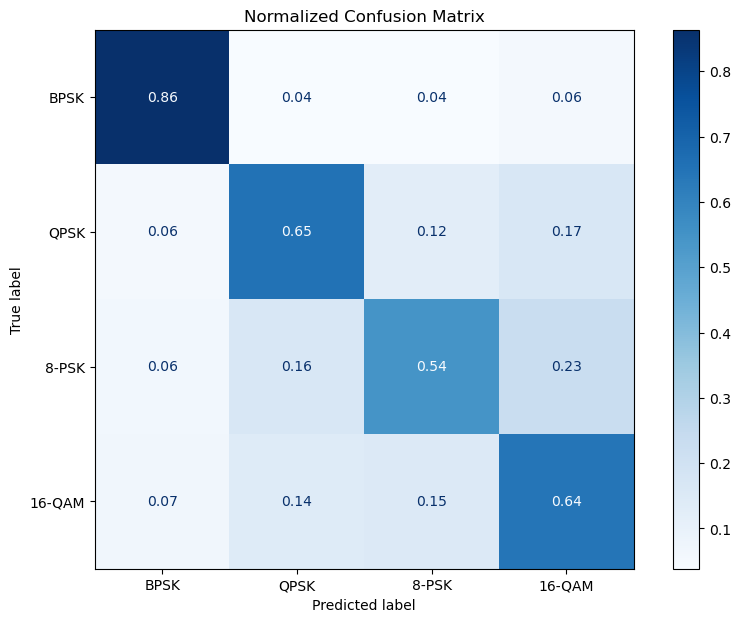

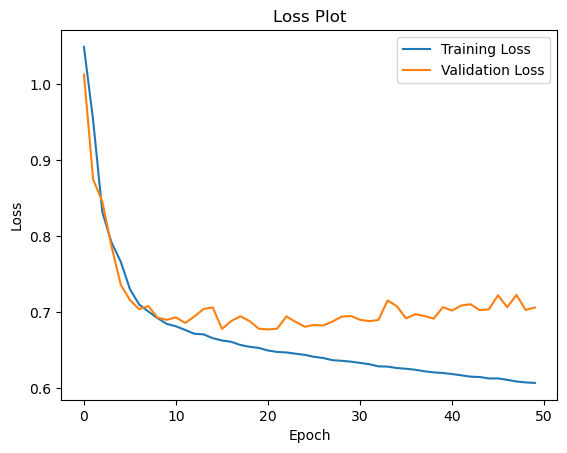

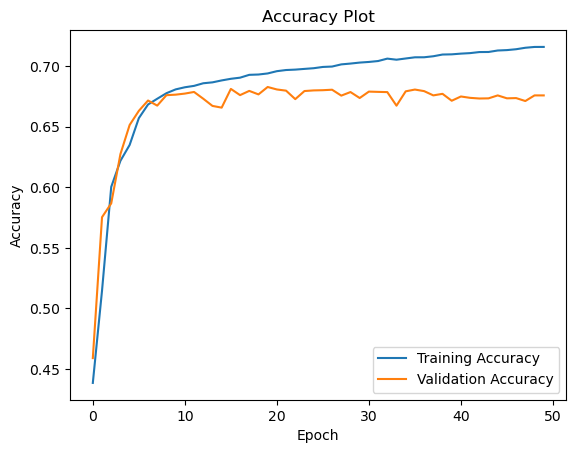

622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


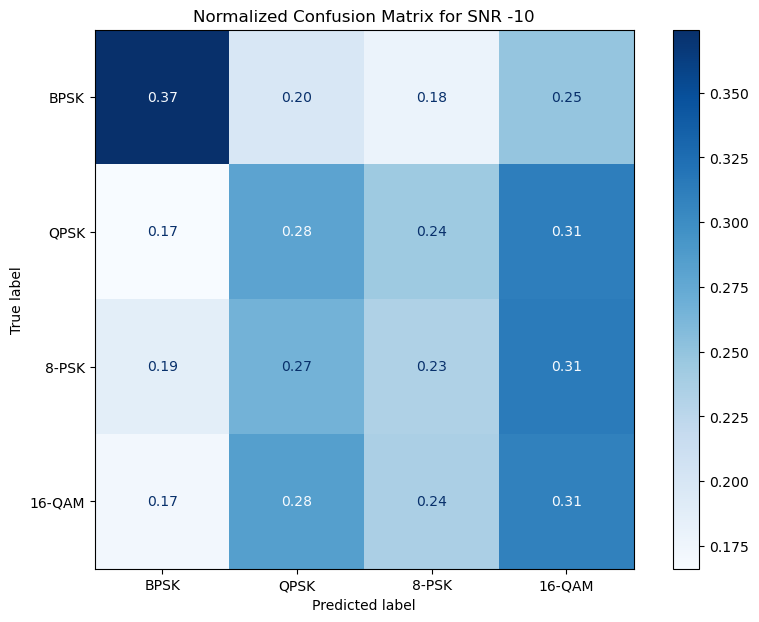

622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


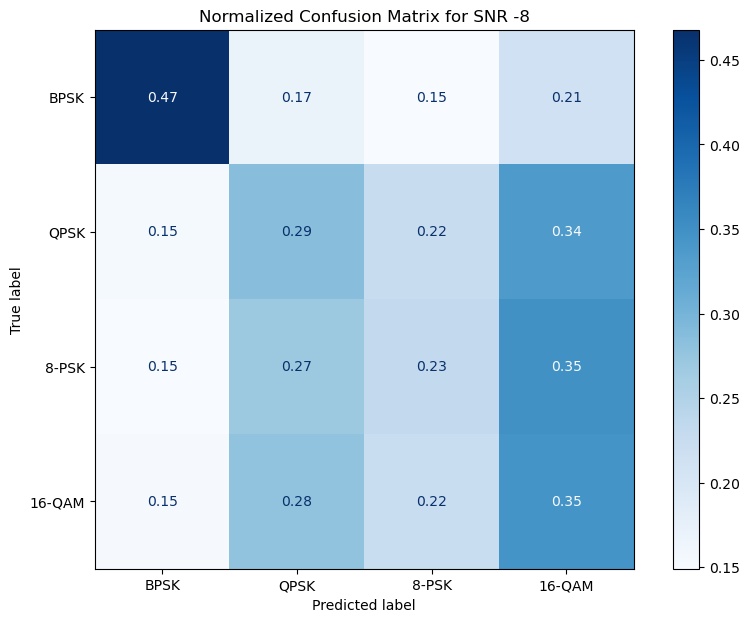

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


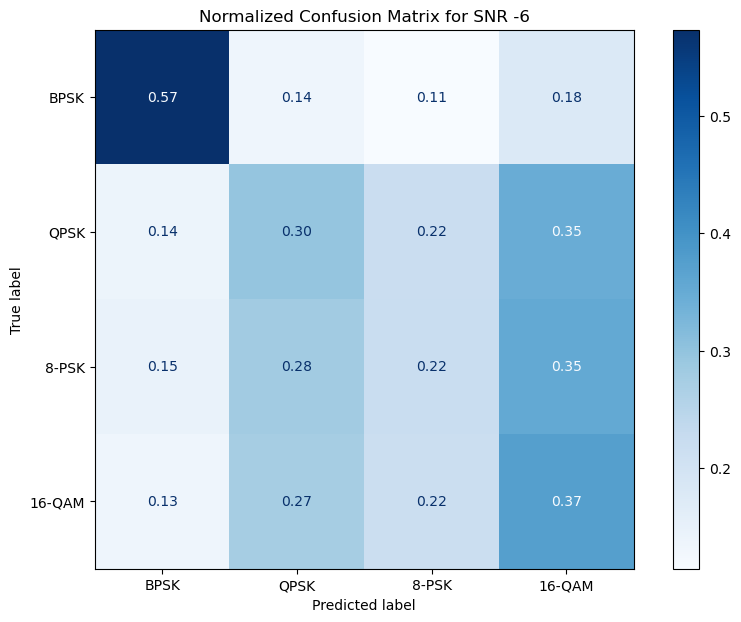

626/626 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


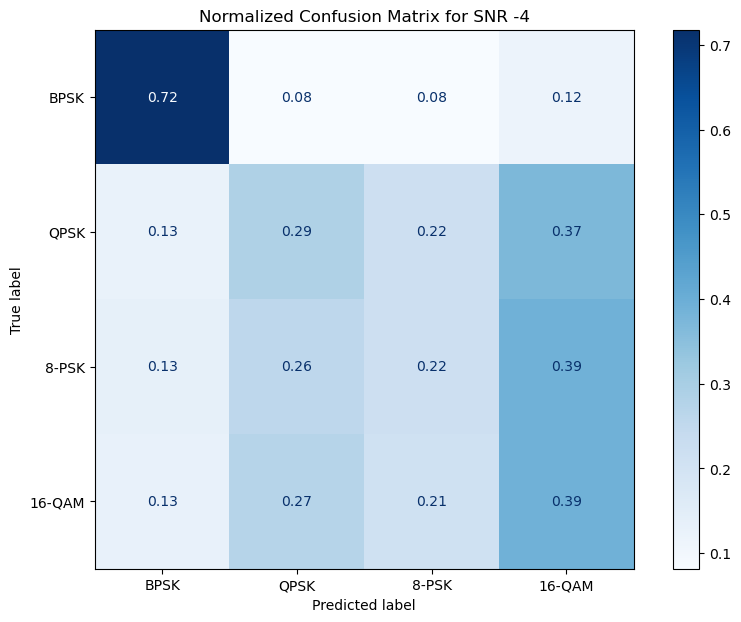

626/626 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


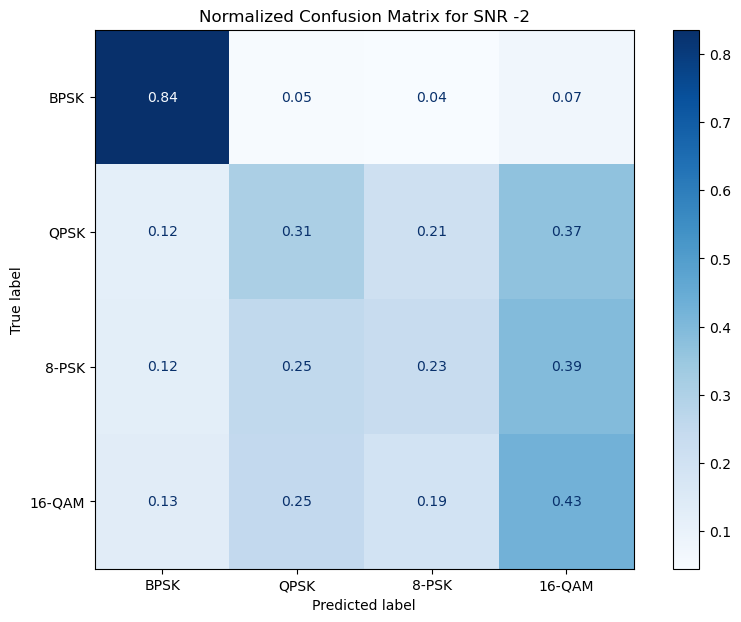

629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


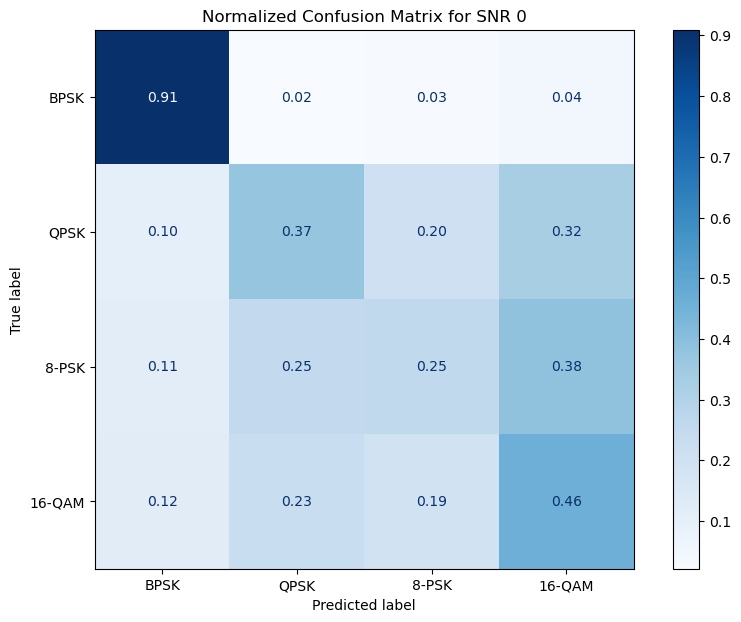

629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


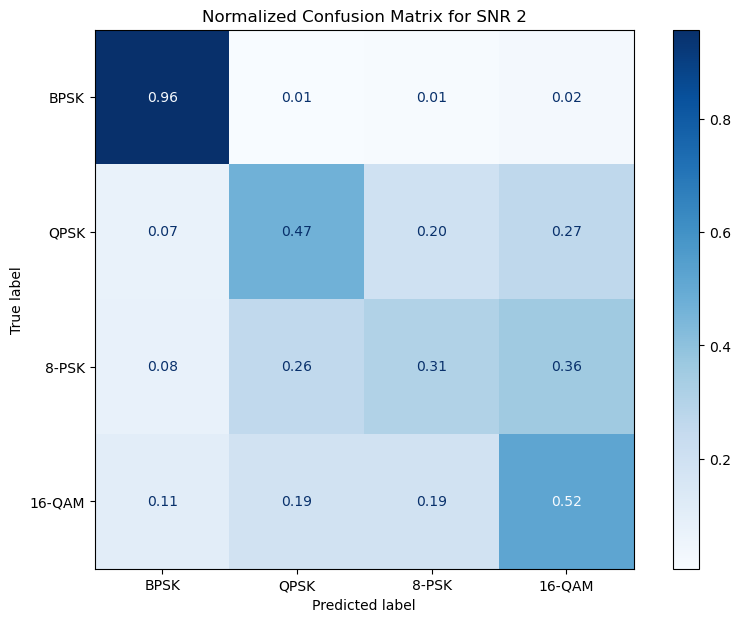

622/622 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


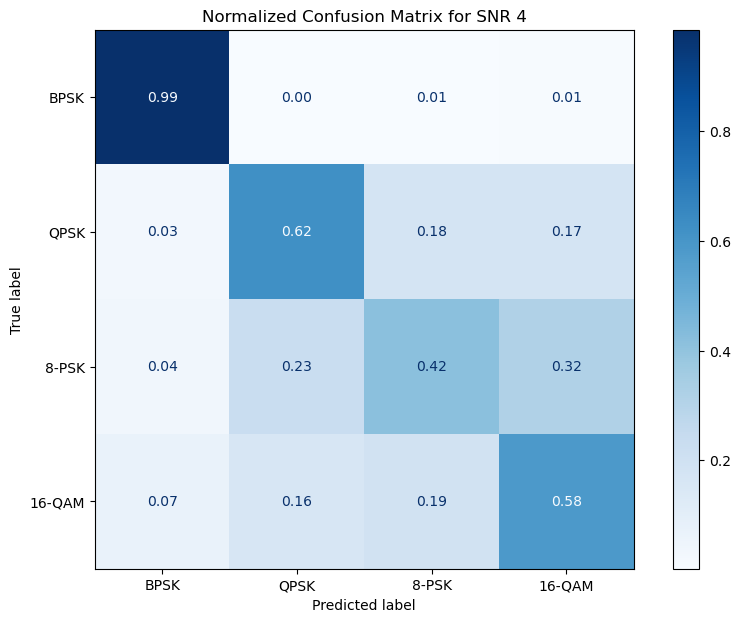

626/626 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


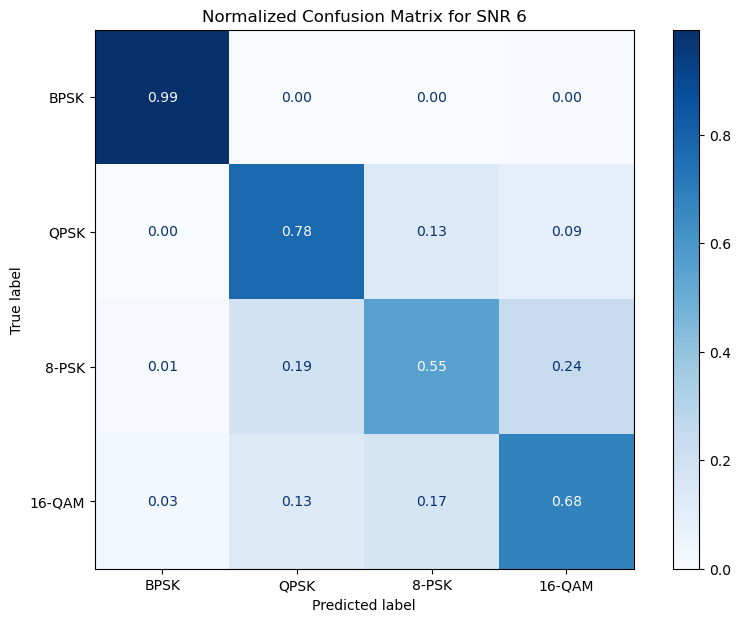

631/631 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


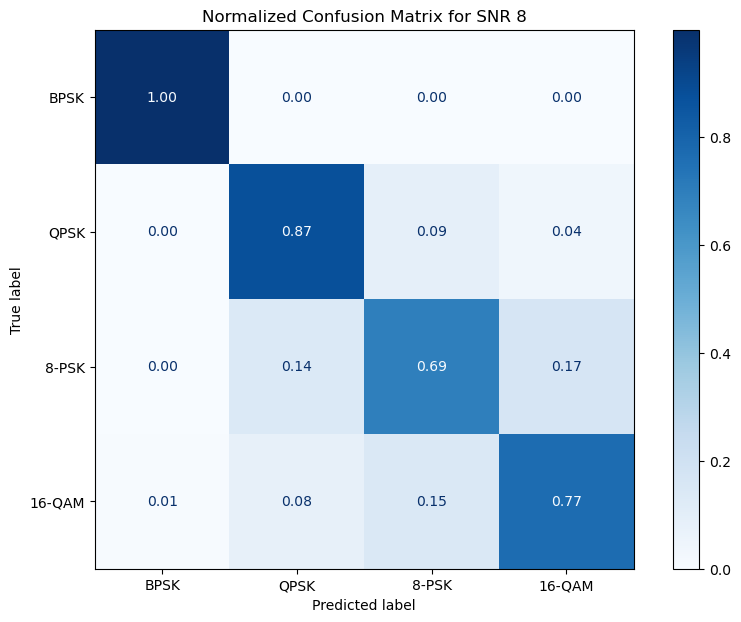

626/626 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


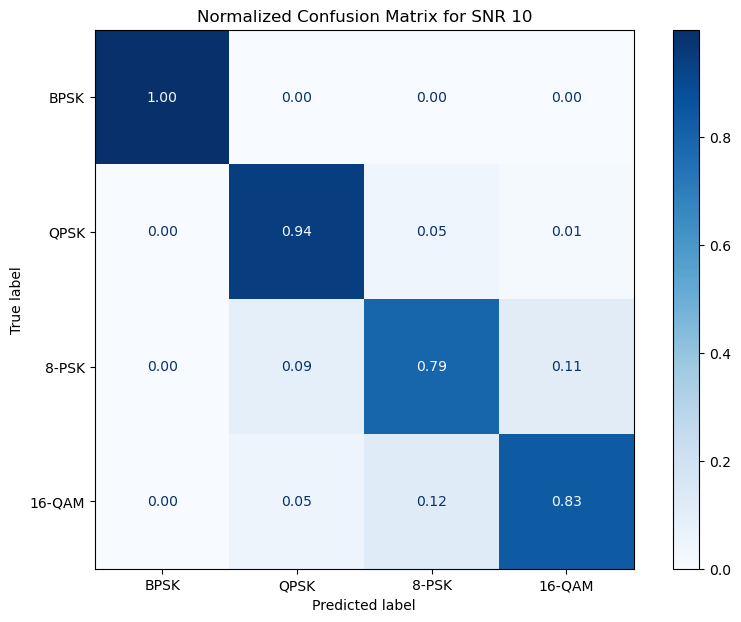

620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


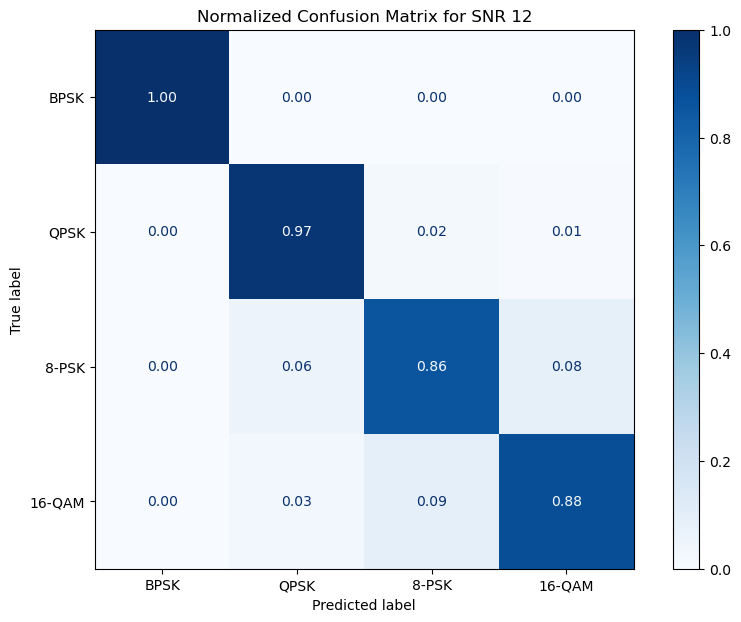

628/628 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


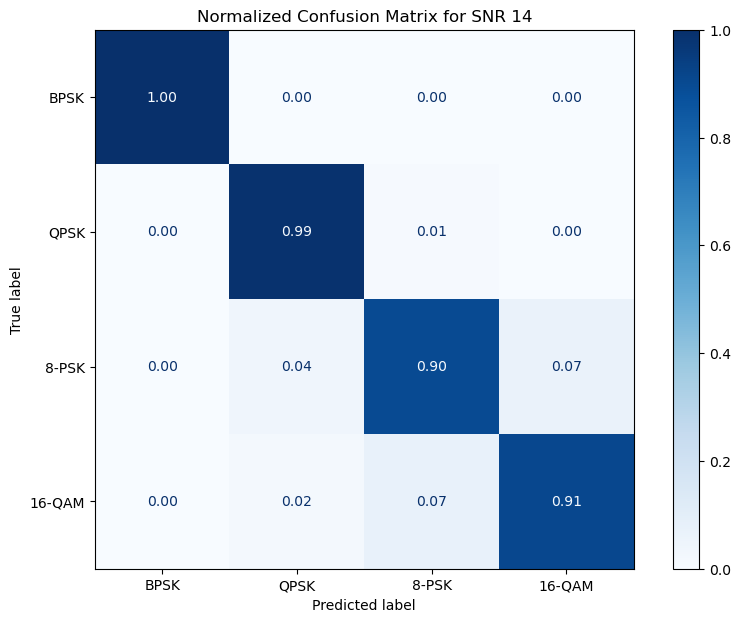

621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


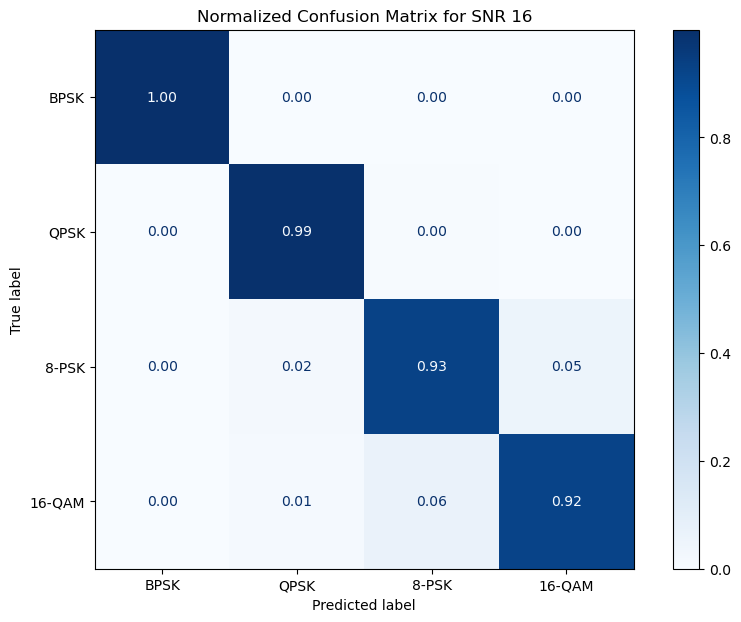

629/629 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


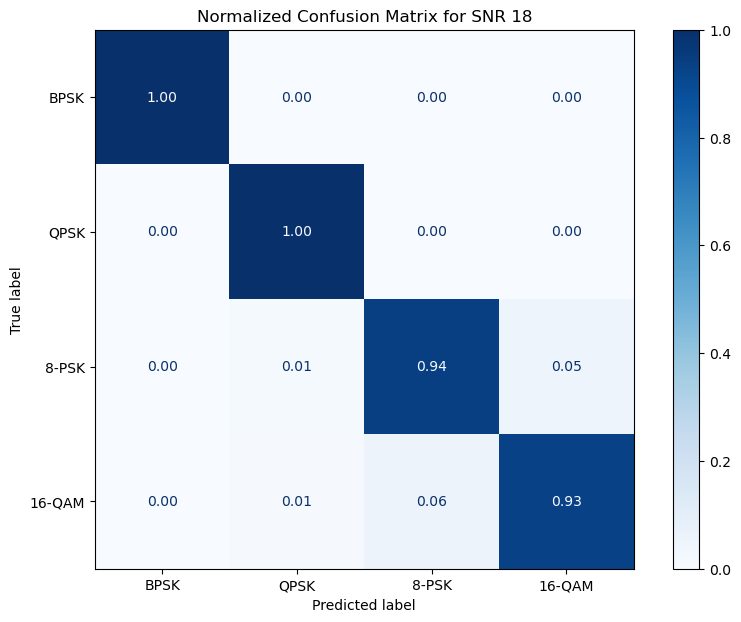

627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


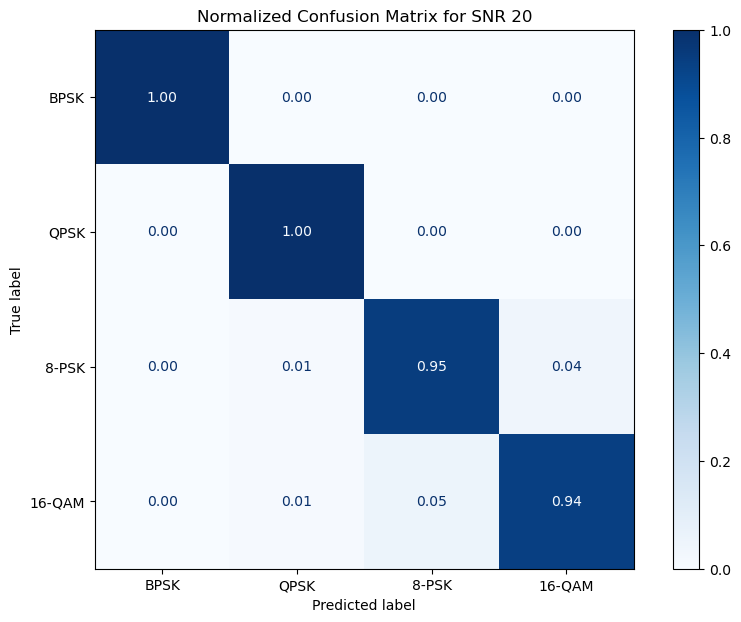

In [89]:
modulation_mapping = {
    0: 'BPSK',
    1: 'QPSK',
    2: '8-PSK',
    3: '16-QAM'
}
# Get the class labels in the order of modulation_mapping
labels = [modulation_mapping[i] for i in range(num_classes)]

def plot_normalized_confusion_matrix(cm, labels):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10, 7))
    disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")
    plt.title('Normalized Confusion Matrix')
    plt.show()

cm = confusion_matrix(y_true, y_pred_classes, labels=np.arange(num_classes))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix:")
print(cm_normalized)
plot_normalized_confusion_matrix(cm_normalized, labels)


# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()


# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()


# Evaluate and plot confusion matrix and accuracy for each SNR level
snr_levels = np.unique(snr_test)
accuracy_per_snr = []

for snr_level in snr_levels:
    def plot_normalized_confusion_matrix(cm, labels, title):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        fig, ax = plt.subplots(figsize=(10, 7))
        disp.plot(cmap=plt.cm.Blues, ax=ax, values_format=".2f")
        plt.title(title)
        plt.show()
        
    # Get data for this SNR level
    snr_indices = np.where(snr_test == snr_level)
    X_snr = X_test[snr_indices]
    y_snr_true = y_true[snr_indices]
    y_snr_test = y_test[snr_indices]

    # Make predictions
    y_snr_pred = model.predict(X_snr)
    y_snr_pred_classes = np.argmax(y_snr_pred, axis=1)

    # Calculate confusion matrix for this SNR level
    snr_conf_matrix = confusion_matrix(y_snr_true, y_snr_pred_classes, labels=np.arange(num_classes))
    
    # Normalize the confusion matrix by row (true labels)
    snr_conf_matrix_normalized = snr_conf_matrix.astype('float') / snr_conf_matrix.sum(axis=1)[:, np.newaxis]

    plot_normalized_confusion_matrix(snr_conf_matrix_normalized, labels, f'Normalized Confusion Matrix for SNR {snr_level}')

    # Calculate accuracy
    accuracy = np.sum(y_snr_pred_classes == y_snr_true) / len(y_snr_true)
    accuracy_per_snr.append(accuracy)

In [ ]:
# Extract weights and biases from the dense layers
weights_biases = {}

# Dense layer with 128 neurons
weights_biases['dense_128'] = {
    'weights': model.get_layer(index=8).get_weights()[0],
    'biases': model.get_layer(index=8).get_weights()[1]
}

# Dense layer with 24 neurons
weights_biases['dense_24'] = {
    'weights': model.get_layer(index=9).get_weights()[0],
    'biases': model.get_layer(index=9).get_weights()[1]
}

# Dense layer with 4 neurons (output layer)
weights_biases['dense_4'] = {
    'weights': model.get_layer(index=10).get_weights()[0],
    'biases': model.get_layer(index=10).get_weights()[1]
}

# Save the weights and biases in the desired format
with open("WeightsAndBiases.txt", "w") as f:
    for layer, wb in weights_biases.items():
        f.write(f"Layer: {layer}\n")
        f.write(f"Weights:\n{wb['weights']}\n")
        f.write(f"Biases:\n{wb['biases']}\n")
        f.write("\n")

print("Weights and biases saved to WeightsAndBiases.txt")
